# visualizeSPRMoutputs
### v1.5.6 December 8, 2025

## How to use this notebook:

1. **Specify input folder and base filename for a desired dataset in the cell below this
2. **Run all cells

In [15]:
#replace these with desired path to the output folder created by SPRM and the name of the input file
#folder_path = "sprm_demo_outputs/"
input_file = folder_path+"image_demo.ome.tiff"

In [32]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib
%matplotlib inline
def dispclustersandlegend(png,csv=None):
    image = Image.open(png+".png")
    plt.figure()
    plt.imshow(image)
    plt.title(png)
    plt.axis('off')
    plt.show()
    if csv is not None:
        legend = pd.read_csv(csv+".csv")
        print(legend)

## Show image quality metrics

In [17]:
import json
with open(input_file + "-SPRM_Image_Quality_Measures.json", "r") as f:
    jsoncontent = json.load(f)
print(jsoncontent)

{'Image Information': {'Number of Channels': 4}, 'Image Quality Metrics not requiring image segmentation': {'Signal To Noise Otsu': {'CD31': 19257.30787829519, 'CD45': 10.9687027877365, 'CD8': 13.33564545889658, 'DAPI_2': 5.412687988763175}, 'Signal To Noise Z-Score': {'CD31': 0.0121527634153536, 'CD45': 1.3297948906168422, 'CD8': 0.8293755466561209, 'DAPI_2': 1.5318204052895927}, 'Total Intensity': {'CD31': 1461060.0, 'CD45': 6744156.597502015, 'CD8': 6086255.316594669, 'DAPI_2': 14275355.506136373}}, 'Image Quality Metrics requiring background segmentation': {'1/AvgCVBackground': 0.039340834068856516, 'Fraction of Pixels in Image Background': 0.15112531643550237, 'FractionOfFirstPCBackground': 0.537111540888636}, 'Image Quality Metrics that require cell segmentation': {'Channel Statistics': {'Average per Cell Ratios': {'CD31': {'Cell / Background': 1286.1299110272744, 'Nuclear / Cell': 0.23557413204118008}, 'CD45': {'Cell / Background': 500.23061432793276, 'Nuclear / Cell': 0.3009501

## Pixels colored by the first three principal components of the pixel intensities 
### Table below shows the channels most distinguishing the clusters and their weightings

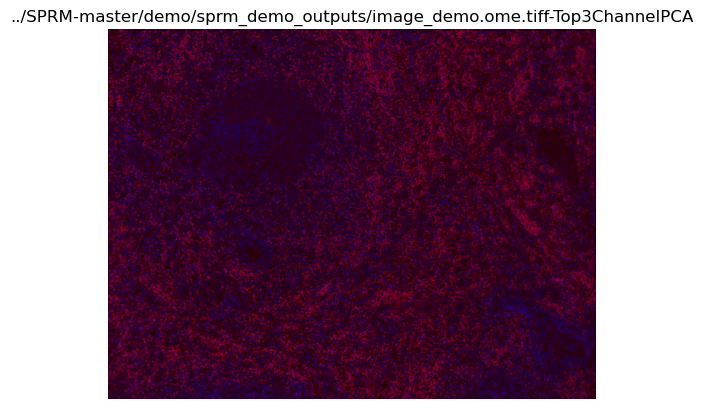

   PCA #      CD31      CD45       CD8    DAPI_2  Explained Variance
0      1  0.006717  0.670741  0.678209  0.300157            0.493963
1      2  0.999932  0.002003  0.003016  0.011084            0.249991
2      3  0.009526  0.240316  0.184201  0.953010            0.226176


In [38]:
dispclustersandlegend(input_file+"-Top3ChannelPCA",input_file+"-channelPCA_summary")

## Cell Adjancy Graph shows lines between cells that are within shown distance (in pixels) of each other

In [19]:
import base64
with open(input_file + "_AdjacencyGraph.pdf", "rb") as pdf:
    content = pdf.read()
# encode PDF
base64_pdf = base64.b64encode(content).decode("utf-8")
# display encoded PDF
IFrame(f"data:application/pdf;base64,{base64_pdf}", width=600, height=400)

## Cells colored by cell cluster after clustering using UMAP embedding of all features

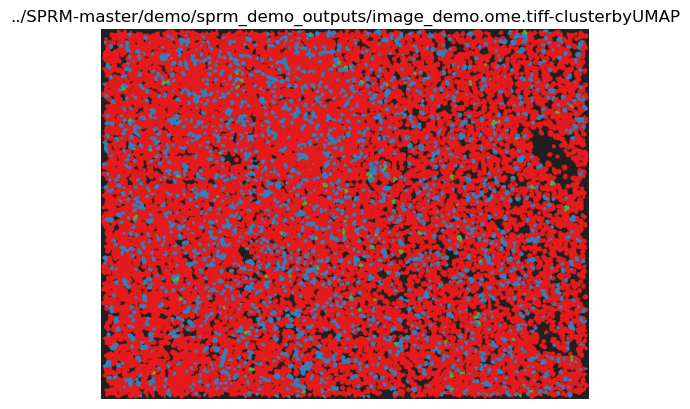

In [33]:
dispclustersandlegend(input_file+"-clusterbyUMAP")

## Cells colored by cell cluster using different feature sets of whole cells
### Tables below each image show the channels most distinguishing the clusters and their average feature value for each cluster (covariance features are correlations between two channels)

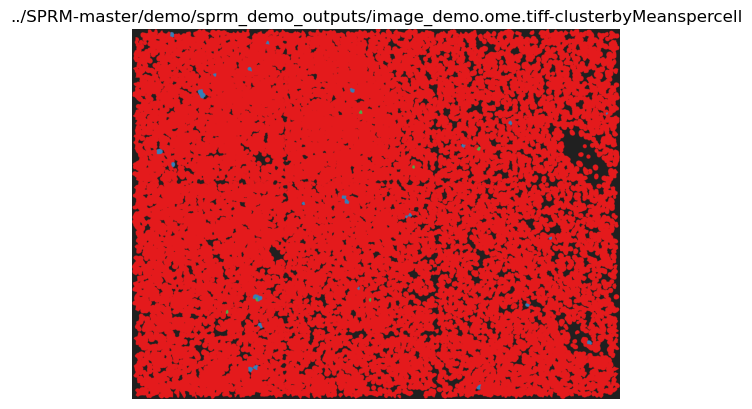

   ID    DAPI_2       CD8      CD45
0   1  1.971743  0.703345  0.820566
1   2  2.273540  0.434463  0.605427
2   3  2.751462  0.534464  0.637799


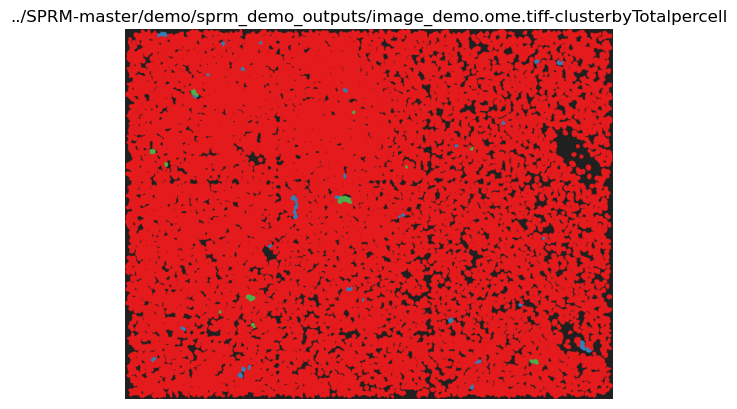

   ID       DAPI_2         CD8        CD45
0   1  1121.999333  433.279307  489.133209
1   2  2210.547872  379.934247  550.773684
2   3  1422.418490  324.832053  418.479581


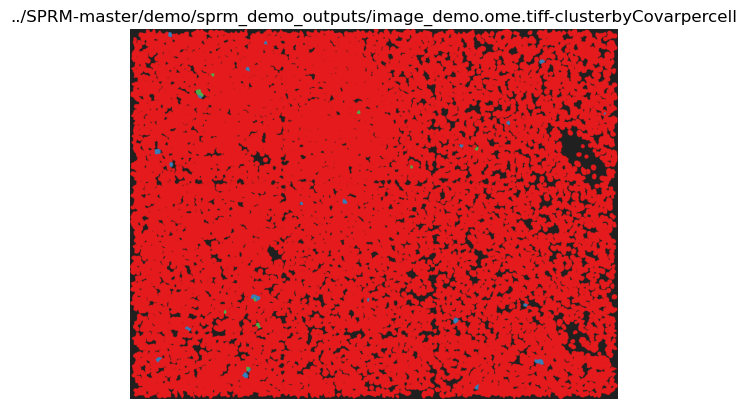

   ID  DAPI_2:DAPI_2  CD31:CD8  CD8:DAPI_2
0   1       1.073581 -0.005035   -0.180972
1   2       2.046301  0.261740   -0.043862
2   3       1.976753 -2.651659   -0.016994


In [34]:
dispclustersandlegend(input_file+"-clusterbyMeanspercell",input_file+"-clustercell_mean_legend")
dispclustersandlegend(input_file+"-clusterbyTotalpercell",input_file+"-clustercell_total_legend")
dispclustersandlegend(input_file+"-clusterbyCovarpercell",input_file+"-clustercell_covariance_legend")

## Cells colored by cell cluster using different feature sets of nuclei
### Tables below each image show the channels most distinguishing the clusters and their average feature value for each cluster (covariance features are correlations between two channels)

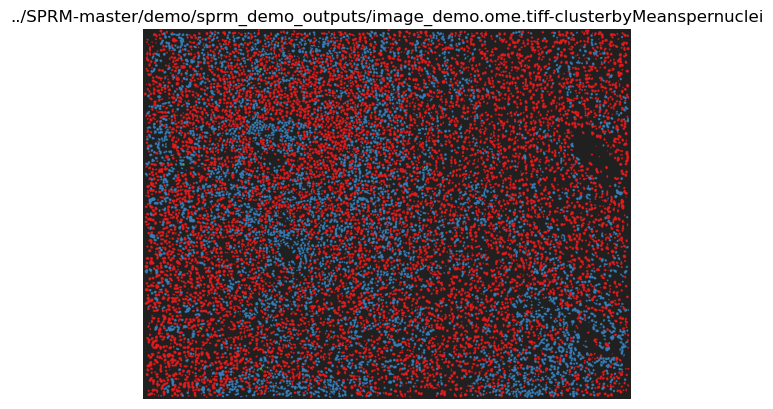

   ID    DAPI_2       CD8      CD45
0   1  3.793951  0.386451  0.647238
1   2  3.957192  0.506663  0.622506
2   3  2.543938  0.507032  0.682852


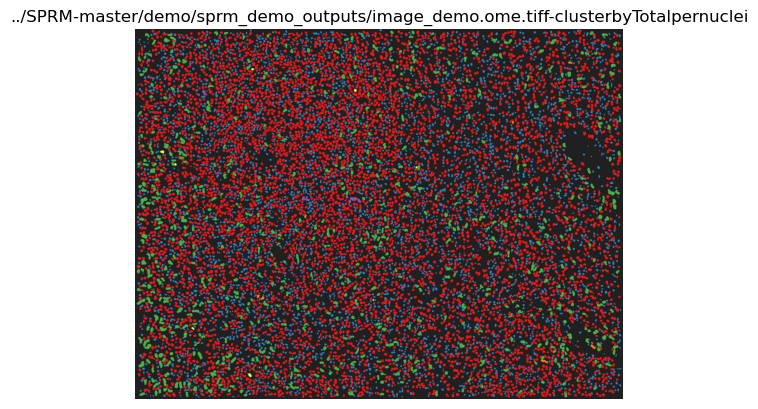

   ID       DAPI_2         CD8        CD45
0   1   811.996710  112.712601  170.879895
1   2  1195.056525  114.191959  183.258614
2   3   333.220051   62.205679   86.683201
3   4   986.436606   89.715326  146.124627
4   5  1643.553965  300.187239  357.924542
5   6   975.012802   92.329020  135.608424
6   7   875.652125   90.625619  141.413650


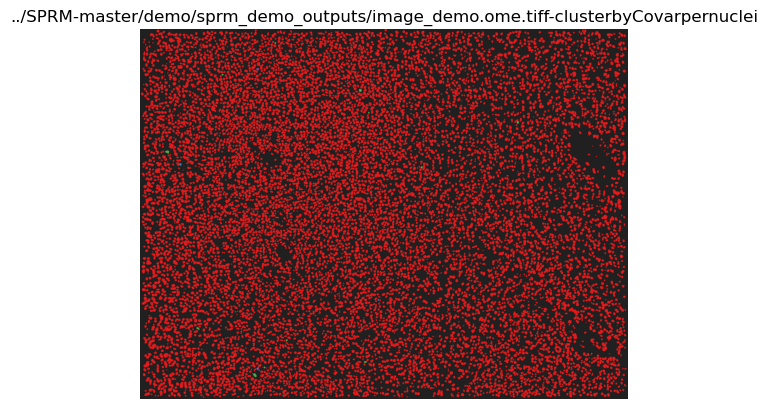

   ID  DAPI_2:DAPI_2   CD31:CD8  CD8:DAPI_2
0   1       0.455700   0.000435   -0.040217
1   2       1.331354  -1.860380    0.033015
2   3       1.289010   2.775541    0.000852
3   4       1.812106  10.892210    0.023504


In [36]:
dispclustersandlegend(input_file+"-clusterbyMeanspernuclei",input_file+"-clusternuclei_mean_legend")
dispclustersandlegend(input_file+"-clusterbyTotalpernuclei",input_file+"-clusternuclei_total_legend")
dispclustersandlegend(input_file+"-clusterbyCovarpernuclei",input_file+"-clusternuclei_covariance_legend")

## Cells colored by cell cluster using cell shape+size or normalized shape

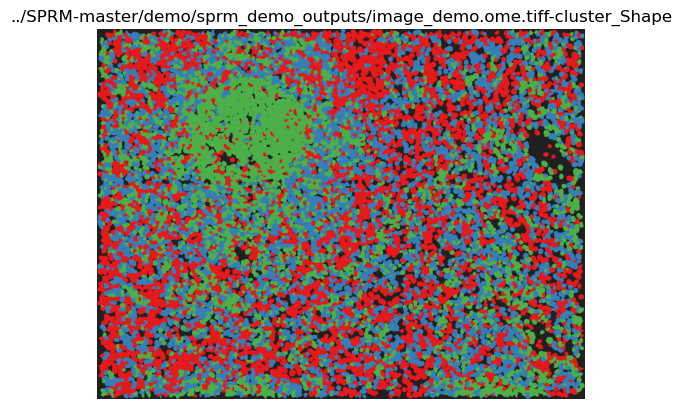

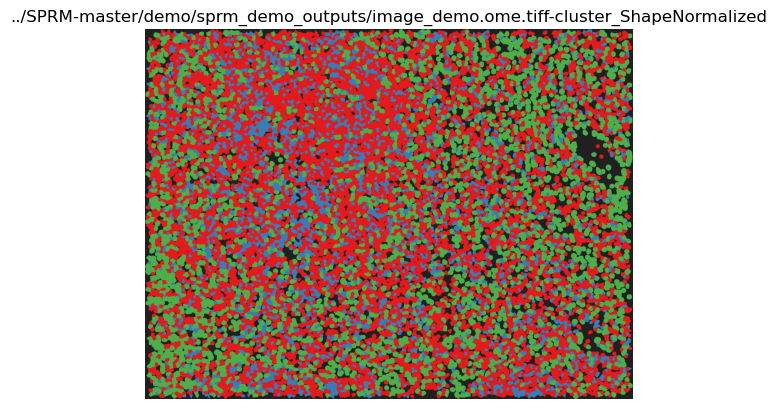

In [35]:
dispclustersandlegend(input_file+"-cluster_Shape")
dispclustersandlegend(input_file+"-cluster_ShapeNormalized")

## The cell centers, cell features (in separate files by feature type), and the cluster assignments for each cell (only for those not ignored because it was too small or touching the image edge) are contained in CSV files
### The first 5 rows of each CSV are shown

In [22]:
import pandas as pd
cellcenters = pd.read_csv(input_file + "-cell_centers.csv")
cellcenters.head()

ID    x       y    z
0   0  0.0     0.0  0.0
1   1  4.0  2096.0  0.0
2   2  5.0  2643.0  0.0
3   3  5.0  1520.0  0.0
4   4  6.0  1292.0  0.0

In [23]:
cellchannelmean = pd.read_csv(input_file + "-cell_channel_mean.csv")
cellchannelmean.head()

ID  CD31      CD45       CD8    DAPI_2
0  19   0.0  1.426337  1.339412  1.960549
1  31   0.0  1.383243  1.637586  1.454641
2  49   0.0  0.659794  0.528512  2.783415
3  52   0.0  1.287008  1.533587  1.975893
4  69   0.0  0.361444  0.264212  1.558617

In [24]:
cellclusters = pd.read_csv(input_file + "-cell_cluster.csv")
cellclusters.head()

ID  K-Means [Texture]  K-Means [Mean] Expression  \
0  19                  1                          1   
1  31                  1                          1   
2  49                  1                          1   
3  52                  1                          1   
4  69                  1                          1   

   K-Means [Covariance] Expression  K-Means [Total] Expression  \
0                                1                           1   
1                                1                           1   
2                                1                           1   
3                                1                           1   
4                                1                           1   

   K-Means [Mean-All-SubRegions] Expression  K-Means [tSNE_All_Features]  \
0                                         1                            2   
1                                         1                            2   
2                                         1                            2   
3                                         1                            1   
4                                         1                            3   

   K-Means [UMAP_All_Features]  K-Means [Shape-Vectors]  \
0                            3                        2   
1                            3                        1   
2                            2                        2   
3                            3                        2   
4                            1                        1   

   K-Means [Shape-Vectors Normalized]  
0                                   1  
1                                   1  
2                                   2  
3                                   2  
4                                   1